In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
from sklearn import metrics

Estimated number of clusters: 3
Estimated number of noise points: 22
Homogeneity: 0.947
Completeness: 0.868
V-measure: 0.906
Adjusted Rand Index: 0.943
Adjusted Mutual Information: 0.905
Silhouette Coefficient: 0.621


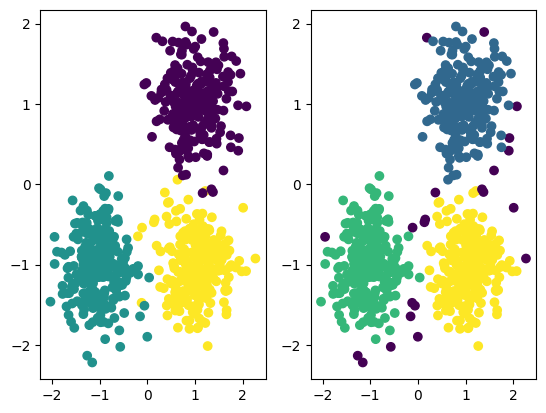

In [ ]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)

db = DBSCAN(eps=0.3, min_samples=10).fit(X)

labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print("Adjusted Mutual Information:" f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=labels_true)
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=labels)